In [31]:
# Let's build a decision tree
import sklearn.datasets as datasets
import pandas as pd
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
print(y.shape) 
df.head()

(150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(df, y) # you don't need to assign this as a variable because it will automatically be saved in the model
yhat = dtree.predict(df) # these are our predicts
print(y - yhat) # this shows that we've trained our model on the whole dataset

dtree.feature_importances_ # this helps us work out which features are most important

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


array([0.        , 0.01333333, 0.56405596, 0.42261071])

In [24]:
# this cell is just to show us what the decision tree looks like

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

# graph-viz is not python!
export_graphviz(dtree,
                out_file = dot_data,
               filled = True,
               rounded = True,
               special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()); 

In [25]:
# let's go ahead and build a random forest
# make moons is a function that we can call. It's actually not very interesting, so we'll do a different one

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.35, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)

(75, 2)
(25, 2)
(75,)
(25,)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [14]:
# let's do our random forest on the cancer dataset in sklearn
from sklearn.datasets import load_breast_cancer
cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target
total_features = len(X.columns)
print(X.shape)
print(y.shape)

# the standard split here is 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# this is how we create our model, fit it with train data, and test it on test dataset)
# max_features will by default work out the sqrt of total number of features we have
forest = RandomForestClassifier(n_estimators=40, random_state=2)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
print(y_test - y_pred) # this is the array of accuracy

# a better way to evaluate the model is by using .score(), which returns the avg accuracy on test data and labels
acc = forest.score(X_test,y_test)
print("Model accuracy is {:.1%}".format(acc))

(569, 30)
(569,)
[ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
Model accuracy is 97.2%


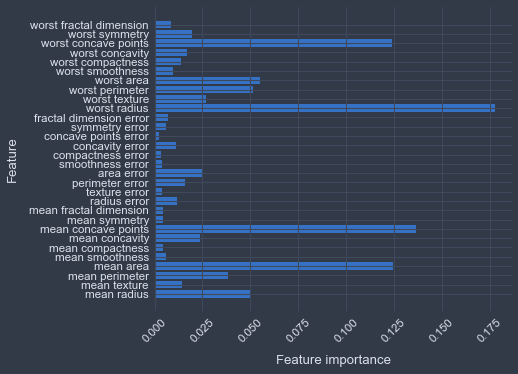

In [16]:
# we should have a look at how important features are in are random forest

import matplotlib.pyplot as plt
import numpy as np
from jupyterthemes import jtplot
jtplot.style('chesterish', fscale=1.1, spines=False, grid=True)

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xticks(rotation=45)
    plt.xlabel("Feature importance",labelpad=10)
    plt.ylabel("Feature",labelpad=10)
    
plot_feature_importances_cancer(forest)

In [19]:
# let's look at feature importance for one decision tree also

cancer_dtree = DecisionTreeClassifier()
cancer_dtree.fit(X_train,y_train)

plot_feature_importances_cancer(cancer_dtree)

ValueError: Unknown label type: 'continuous'

(50, 10)
(50, 10)
(50,)
(50,)


<function matplotlib.pyplot.show>

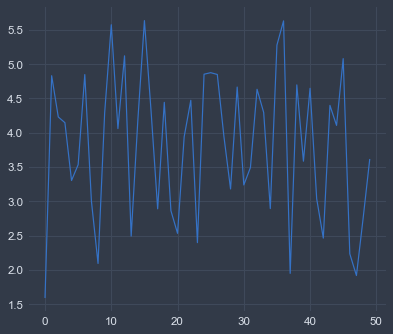

In [20]:
# create a formula that creates datasets. half will be random, half x will be correlated with y
# x will be 10 columns
from numpy import random

def gen_data(x):
    y = x[:,0]*np.sin(x[:,0]) + np.sin(2*x[:,1]) + 3*x[:,2] + .4*x[:,3] + x[:,4]
    y = y+0.75*random.rand(len(y))
    
    split = 0.5
    x_train = x[0:int(split*len(x)),:]
    x_test = x[int(split*len(x)):len(x),:]
    y_train = y[0:int(split*len(x))]
    y_test = y[int(split*len(x)):len(y)]
    
    return x_train, x_test, y_train, y_test


x = np.random.rand(100, 10)
x_train,x_test,y_train,y_test = gen_data(x)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

ax = plt.plot(range(len(y_train)),y_train)
plt.show


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

# gradient boosting regression tree
gbrt = GradientBoostingClassifier(random_state=50,max_depth=2,verbose=1)
gbrt.fit(X_train,y_train)
train_score = gbrt.score(X_train,y_train)
test_score = gbrt.score(X_test,y_test)
print("Training Score is {:.1%}".format(train_score))
print("Test Score is {:.1%}".format(test_score))

      Iter       Train Loss   Remaining Time 
         1           1.1668            0.31s
         2           1.0424            0.22s
         3           0.9391            0.19s
         4           0.8513            0.18s
         5           0.7781            0.17s
         6           0.7086            0.18s
         7           0.6500            0.17s
         8           0.5992            0.17s
         9           0.5533            0.17s
        10           0.5138            0.16s
        20           0.2744            0.13s
        30           0.1794            0.12s
        40           0.1253            0.10s
        50           0.0885            0.08s
        60           0.0654            0.06s
        70           0.0517            0.04s
        80           0.0421            0.03s
        90           0.0347            0.01s
       100           0.0289            0.00s
Training Score is 100.0%
Test Score is 97.9%


In [17]:
# python generators - they're good because they don't hold values in memory. if you have millions of items to loop through, this becomes useful 
# they essentially compute a function, but then allow you to ask for specific values and it will give then to you one by one

# this is the way that I remember learning how to create lists
def square_numbers(nums):
    result = []
    for i in nums:
        result.append(i*i)
    return result

my_nums = square_numbers([1,2,3,4,5])
print(my_nums)


# a generator approach would be the following. Running this creates a generator object that hasn't yet calculated anything
def sqr_num_gen(nums):
    for i in nums:
        yield(i*i) # this makes it a generator

# this line then stores the generator object that we can call
my_nums_gen = sqr_num_gen([1,2,3,4,5])
print(my_nums_gen)

# we can iterator over the generator object by calling 'next'
print(next(my_nums_gen)) # this is the first instance of the generator
print(next(my_nums_gen)) # this is the second instance of the generator

# we can use a for loop here
for num in my_nums_gen:
    print(num)

# similarly how we do list enumeration, we can do this for a generator too, just by using () parenthesis
my_nums_gen2 = (i*i for i in [1,2,3,4,5])
print(my_nums_gen2)

# we can turn this into a list, but you lose the performance advantages of a generator by putting everything into memory
print(list(my_nums_gen2))

[1, 4, 9, 16, 25]
<generator object sqr_num_gen at 0x107b3f938>
1
4
9
16
25
<generator object <genexpr> at 0x107b3f780>
[1, 4, 9, 16, 25]
